**<h1><span style="color: BurlyWood;">Data-Driven Trend Detection for African Restaurants: Focus on Amala in the UK</span></h2>**

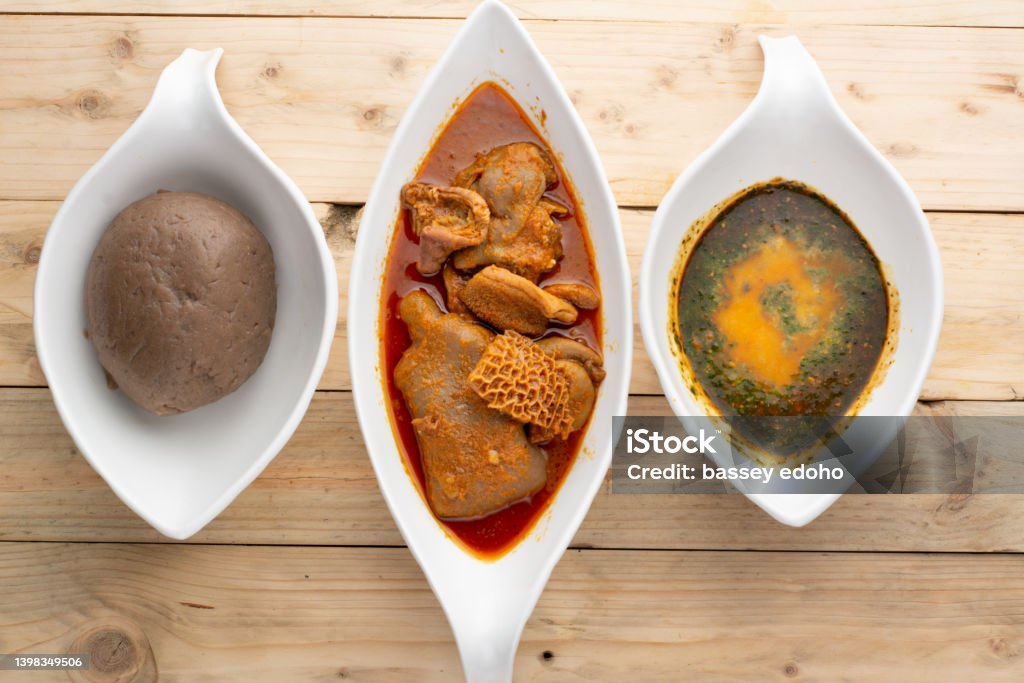

In [15]:
from IPython.display import Image,Markdown, display #importing the cover image
image_path = r"C:\Users\Saliu\OneDrive\Desktop\Amala-trend-detection-uk\istockphoto-1398349506-1024x1024.jpg"
# Display the image
Image(filename=image_path,width=1500, height=800)

**<h2><span style="color: BurlyWood;">Table Of Content</span></h2>**
* 1.0 Introduction
* 2.0  Libraries & Configuration
  * 2.1 Libraries
  * 2.2 functions
  * 2.3 Configuration
* 3.0 Data Cleaning
* 4.0 EXploratory Data Analysis
  * 4.1 Loading the datset
* 5.0 Strategic Recommendations
* 6.0 Conclusion

# 🍲 Data-Driven Trend Detection for African Restaurants: Focus on Amala in the UK

This project explores how Nigerian food trends—specifically **Amala**—are adopted in the UK, using data from Google Trends and time series analysis. It supports a case study of *Amala Hut*, a Nigerian restaurant planning to expand into the UK.

## 📌 Objectives
- Scrape and analyze search interest in Amala among UK residents.
- Calculate trend metrics: velocity, acceleration, volatility.
- Help small businesses like Amala Hut decide whether to adopt/expand a food trend.

## 🧰 Tools
- Python, Pandas, NumPy
- Google Trends (via pytrends)
- Matplotlib, Seaborn

## 🗂️ Structure
- `data/` – Raw and processed data
- `notebooks/` – Jupyter notebooks with trend detection code
- `scripts/` – Google Trends scraper
- `reports/` – Decision model and write-up
- `docs/` – Documentation of methods

**<h1><span style="color: BurlyWood;">2.0 Libraries and Configuration</span></h2>**

Importing all relevant python libraries for the Exploratory data and analysis

## 2.1 Libraries
importing relevant libraries and declaring functions

In [20]:
# @title
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
from scipy.stats import kruskal # for statistics test
import seaborn as sns # for visualization
import os   # for operating system dependent functionality
import time     # for time-related functions
from datetime import datetime   # for date and time manipulation
from pytrends.request import TrendReq   # for Google Trends API
from pytrends.exceptions import TooManyRequestsError # for Google Trends API
from IPython.display import display, Markdown # for displaying markdown in Jupyter
import warnings # filtering our warnings
#set seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")
#displaying all columns
pd.set_option('display.max_columns', None)
# Filter out warning output
warnings.filterwarnings('ignore')


## 2.2 Functions
defining functions to be used in the analysis.

In [17]:

# 📘 Function: Print Markdown in Jupyter Notebook
def printmd(string):
    """
    Displays markdown text in Jupyter Notebook.

    Parameters:
        string (str): Markdown-formatted string to display.
    """
    display(Markdown(string))

# 📊 Function: Fetch and Save Google Trends Data
def fetch_google_trends_data(
    keyword: str,
    geo: str = 'GB',
    timeframe: str = 'today 5-y',
    save_dir: str = 'data'
):
    """
    Fetches interest-over-time data from Google Trends and saves it as a CSV file.

    Parameters:
        keyword (str): The keyword to track (e.g., 'Amala').
        geo (str): Country code for location of interest (default = 'GB' for United Kingdom).
        timeframe (str): Timeframe of trend data (default = 'today 5-y' for last 5 years).
        save_dir (str): Folder to save the resulting CSV (default = 'data').

    Returns:
        None
    """

    printmd(f"### 🔍 Fetching Google Trends data for **'{keyword}'** in region **'{geo}'**...")

    # Initialize pytrends request object with retry logic
    pytrends = TrendReq(hl='en-GB', tz=0, retries=3, backoff_factor=0.5)

    try:
        # Build payload with keyword and region
        pytrends.build_payload([keyword], geo=geo, timeframe=timeframe)
        time.sleep(2)  # Pause to avoid rate-limiting

        # Fetch interest-over-time data
        df = pytrends.interest_over_time()

        # Check if data is returned
        if df.empty:
            print(f"[!] No data found for '{keyword}' in {geo}.")
            return

        # Drop 'isPartial' column if present
        if 'isPartial' in df.columns:
            df.drop(columns='isPartial', inplace=True)

        # Ensure directory exists
        os.makedirs(save_dir, exist_ok=True)

        # Generate filename
        date_str = datetime.now().strftime('%Y%m%d')
        filename = f"{keyword.lower().replace(' ', '_')}_trends_{date_str}.csv"
        filepath = os.path.join(save_dir, filename)

        # Save DataFrame to CSV
        df.to_csv(filepath)
        print(f"[✓] Data saved successfully to: {filepath}")

    except TooManyRequestsError:
        print("[⚠] Too many requests sent to Google. Please wait before retrying.")
    except Exception as e:
        print(f"[X] An unexpected error occurred: {e}")


**<h1><span style="color: BurlyWood;">3.O Data Scraping</span></h2>**
scraping and exploring the dataset for Exploratory data analysis

## 3.1 Data Scraping
scraping the dataset using the scraping function

In [ ]:
# fetch_google_trends_data(keyword='Amala', geo='GB', timeframe='today 5-y')

### 🔍 Fetching Google Trends data for **'Amala'** in region **'GB'**...

[✓] Data saved successfully to: data\amala_trends_20250618.csv


C:\Users\Saliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


## 3.1 Data Exploration
Exploring the dataset using the scraping function

In [21]:
# Load trend data
df = pd.read_csv(r"C:\Users\Saliu\OneDrive\Desktop\Amala-trend-detection-uk\data\amala_trends_20250618.csv", parse_dates=["date"])

# Preview the data
df.head()


,date,Amala
0,2020-06-14,32
1,2020-06-21,29
2,2020-06-28,27
3,2020-07-05,25
4,2020-07-12,35


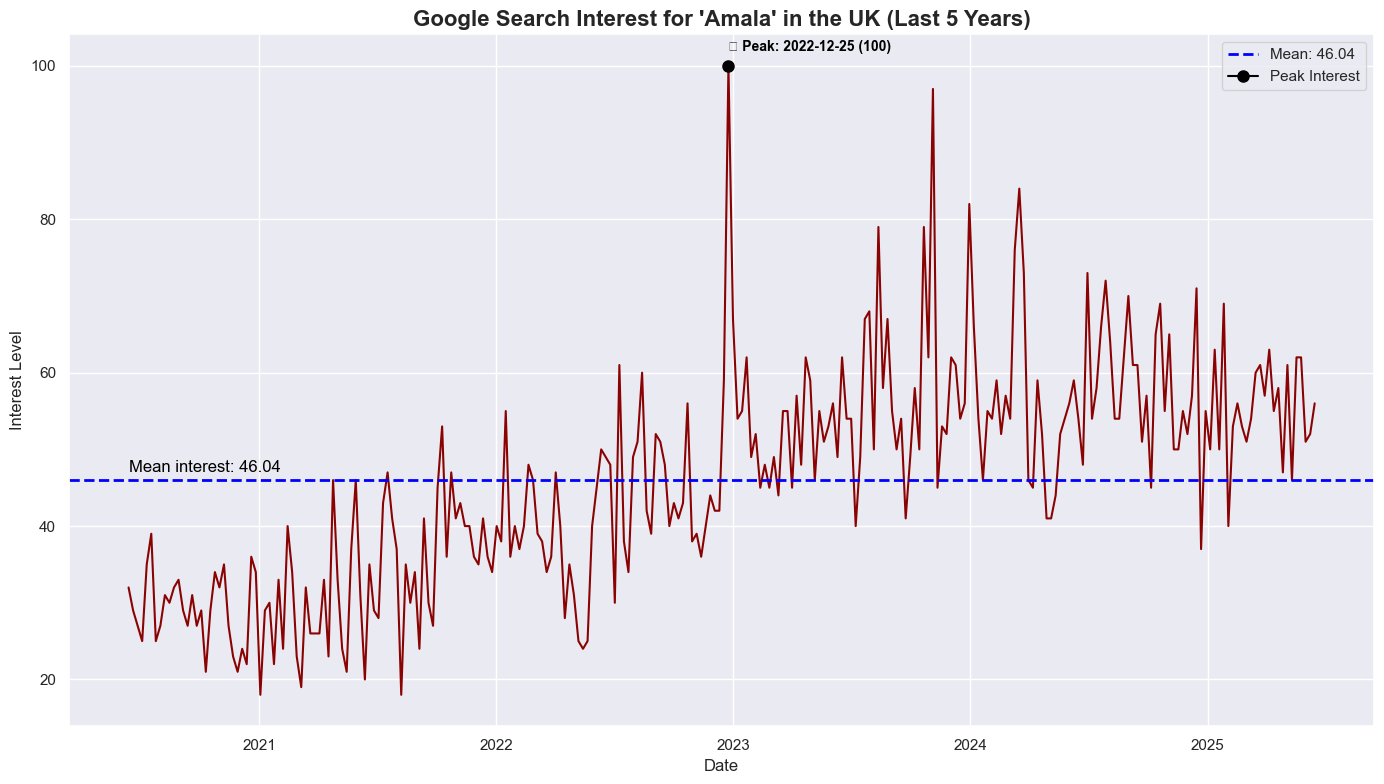

In [43]:
# Line plot of interest over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="date", y="Amala", color='#8A0303')
mean_value = df['Amala'].mean()
plt.axhline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(df['date'].iloc[0], mean_value + 1, f'Mean interest: {mean_value:.2f}', color='black')
peak_date = df['Amala'].idxmax()
peak_value = df['Amala'].max()
peak_day = df.loc[peak_date, 'date']
plt.plot(peak_day, peak_value, marker='o', color='black', markersize=8, label='Peak Interest')
plt.text(peak_day, peak_value + 2, f"📈 Peak: {peak_day.strftime('%Y-%m-%d')} ({peak_value})", 
         color='black', fontsize=10, fontweight='bold')
plt.title("Google Search Interest for 'Amala' in the UK (Last 5 Years)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.legend()
plt.tight_layout()
plt.show()


### 📈 Google Search Interest for “Amala” in the UK (Last 5 Years)

The line chart above shows the **Google search interest over time** for the Nigerian dish **Amala** in the **United Kingdom** over the past five years.

- 🔺 The **peak interest** occurred on **December 25, 2022**, with the search interest reaching the maximum value of **100**. This may align with festive celebrations or Nigerian community gatherings.
- 📊 The **blue dashed line** indicates the **mean interest level** of approximately **46.04**, providing a reference point for interpreting fluctuations.
- 📅 Over time, there's a visible **upward trend** with several notable spikes, reflecting an increasing interest in Amala among the UK population.

These insights support the idea that there's a **growing market opportunity** for African food businesses like **Amala Hut** to expand into the UK.



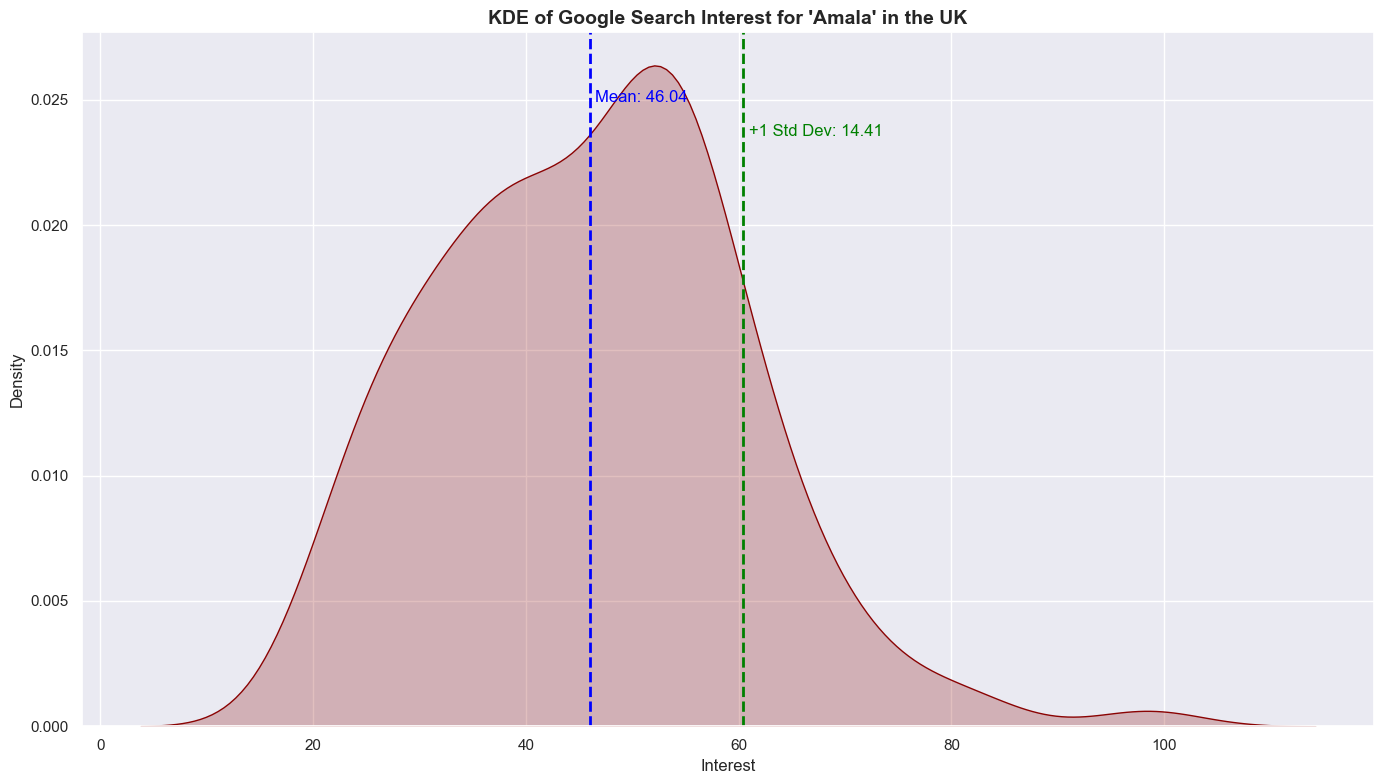

In [ ]:
# mean and standard deviation
mean_value = df['Amala'].mean()
std_value = df['Amala'].std()

# KDE plot
plt.figure(figsize=(14, 8))
sns.kdeplot(df['Amala'], shade=True, color='#8A0303')


plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(mean_value + 0.5, plt.ylim()[1] * 0.9, f"Mean: {mean_value:.2f}", color='blue')

plt.axvline(mean_value + std_value, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {std_value:.2f}')
plt.text(mean_value + std_value + 0.5, plt.ylim()[1] * 0.85, f"+1 Std Dev: {std_value:.2f}", color='green')

plt.title("KDE of Google Search Interest for 'Amala' in the UK", fontsize=14, fontweight='bold')
plt.xlabel("Interest")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

### 📊 Distribution of Google Search Interest for "Amala" in the UK

The KDE plot above shows the **distribution** of weekly Google search interest scores for *Amala* in the United Kingdom over the last five years.

- 🔵 The **blue dashed line** represents the **mean interest level**, which is **46.04**. This reflects the average weekly interest score over the observed period.
- ✅ The **green dashed line** represents **one standard deviation above the mean**, at **approximately 60.45**. This provides context for identifying weeks with unusually high interest.
- 🧭 The distribution is **right-skewed**, indicating that while most weeks saw moderate search activity, there were **occasional spikes** in interest (e.g., during holidays or cultural events).
- 🧮 The **density peak** around the 45–50 range shows that interest was frequently around that level, reinforcing the consistency of moderate search volume.

This analysis helps identify not just when interest peaked, but how *common* such interest levels are—useful for **predicting baseline demand** or planning marketing campaigns for African cuisine in the UK.
